In [1]:
import sys, os
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pydub
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import torch.nn as nn
from datasets import *
from loading import load_model
#import torchaudio
#from torchaudio import transforms
import h5py as hf

os.environ["CUDA_VISIBLE_DEVICES"]="0"

/home/fleeb/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
def parameter_count(module):
    s = sum([np.prod(d.size()) for d in module.parameters()])
    return s

In [134]:
root = 'trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/'
#root = 'trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/'
#root = 'trained_nets/gan-jmel-gain5-3000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102437'
name = 'checkpoint_{}.pth.tar'

In [135]:
models = []
indices = [] 

In [136]:
for i in range(0,50, 5):
    #print(i)
    if i not in indices:
        models.append( load_model(os.path.join(root, name.format(i+1))) )
        models[-1].cpu()
        indices.append(i)

ckpt = torch.load(os.path.join(root, name.format(i+1)))
args = ckpt['args']
len(models), indices

Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_1.pth.tar
Norm: True
Saved params loaded
Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_6.pth.tar
Norm: True
Saved params loaded
Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_11.pth.tar
Norm: True
Saved params loaded
Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_16.pth.tar
Norm: True
Saved params loaded
Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_21.pth.tar
Norm: True
Saved params loaded
Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_26.pth.tar
Norm: True
Saved params loaded
Loaded trained_nets/gan-jmel-gain5-1000-jstep5-jclip03-genlayers2-norm-lr4_18-12-07-102547/checkpoint_31.pth.tar
Norm: True
Saved params l

(10, [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

In [14]:
true_data = ckpt['train_data']
len(true_data), true_data.seq_len

(194993, 44100)

In [75]:
ckpt['train_data'].paths

array(['/home/fleeb/workspace/ml_datasets/audio/yt/processed/track0137.h5',
       '/home/fleeb/workspace/ml_datasets/audio/yt/processed/track0601.h5',
       '/home/fleeb/workspace/ml_datasets/audio/yt/processed/track1234.h5',
       ...,
       '/home/fleeb/workspace/ml_datasets/audio/yt/processed/track0873.h5',
       '/home/fleeb/workspace/ml_datasets/audio/yt/processed/track0467.h5',
       '/home/fleeb/workspace/ml_datasets/audio/yt/processed/track0455.h5'],
      dtype='<U65')

In [84]:
gen = models[-1][1].cuda()
gen.ret_mel = False
print(gen, gen.ret_mel)

MEL_Generator(
  (inventor): RecNet(
    (rec): GRU(256, 384, num_layers=2, batch_first=True)
  )
  (spec): MEL_Spectrogram()
) False


In [137]:
num = 3
seq_len = 30000 # ms

In [138]:
true_data = Yt_Dataset(ckpt['train_data'].paths, seq_len=seq_len, hop=args.hop, )
loader = iter(DataLoader(true_data, batch_size=num, shuffle=True))
len(true_data), len(loader)

(160793, 53598)

In [139]:
true, lbls = next(loader)
true.size(), lbls.size()

(torch.Size([3, 1323000]), torch.Size([3]))

In [141]:
outroot = 'results/gen/'
outgentemp = 'long_gen_epoch{}-{}.mp3'

In [142]:
fail
for i, model in zip(indices, models):
    audio = gen(num=num, seq_len=seq_len).squeeze(1)
    mel = gen.mel.permute(0,2,1)
    
    for B, wav in enumerate(audio.detach().cpu().numpy()):
        seg = samples2audio(wav)
        savepath = os.path.join(outroot, outgentemp.format(str(i+1).zfill(2),B))
        
        seg.export(savepath, format='mp3')
        print(savepath)

results/gen/long_gen_epoch01-0.mp3
results/gen/long_gen_epoch01-1.mp3
results/gen/long_gen_epoch01-2.mp3
results/gen/long_gen_epoch06-0.mp3
results/gen/long_gen_epoch06-1.mp3
results/gen/long_gen_epoch06-2.mp3
results/gen/long_gen_epoch11-0.mp3
results/gen/long_gen_epoch11-1.mp3
results/gen/long_gen_epoch11-2.mp3
results/gen/long_gen_epoch16-0.mp3
results/gen/long_gen_epoch16-1.mp3
results/gen/long_gen_epoch16-2.mp3
results/gen/long_gen_epoch21-0.mp3
results/gen/long_gen_epoch21-1.mp3
results/gen/long_gen_epoch21-2.mp3
results/gen/long_gen_epoch26-0.mp3
results/gen/long_gen_epoch26-1.mp3
results/gen/long_gen_epoch26-2.mp3
results/gen/long_gen_epoch31-0.mp3
results/gen/long_gen_epoch31-1.mp3
results/gen/long_gen_epoch31-2.mp3
results/gen/long_gen_epoch36-0.mp3
results/gen/long_gen_epoch36-1.mp3
results/gen/long_gen_epoch36-2.mp3
results/gen/long_gen_epoch41-0.mp3
results/gen/long_gen_epoch41-1.mp3
results/gen/long_gen_epoch41-2.mp3
results/gen/long_gen_epoch46-0.mp3
results/gen/long_gen

<IPython.core.display.Javascript object>


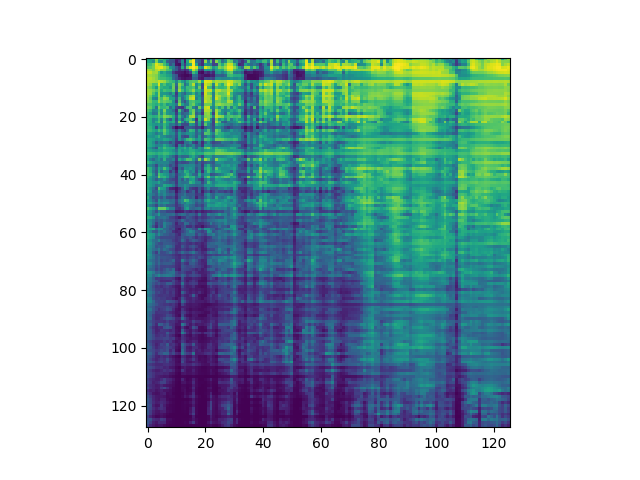

In [94]:
plt.figure()
plt.imshow(mel[2].detach().cpu().numpy())

In [97]:
mel, phase = gen.spec(true.cuda().float(), ret_phase=True)
mel, phase = mel[0], phase[0]
mel.size(), phase.size()

(torch.Size([128, 125]), torch.Size([128, 125]))

<IPython.core.display.Javascript object>


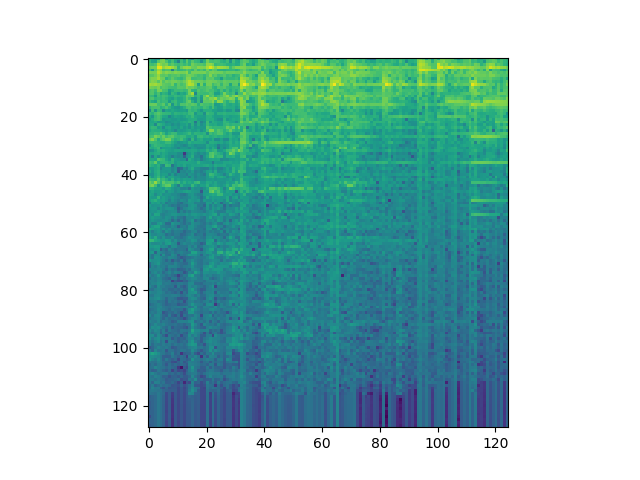

In [98]:
plt.figure()
plt.imshow(mel.detach().cpu().numpy())

<IPython.core.display.Javascript object>


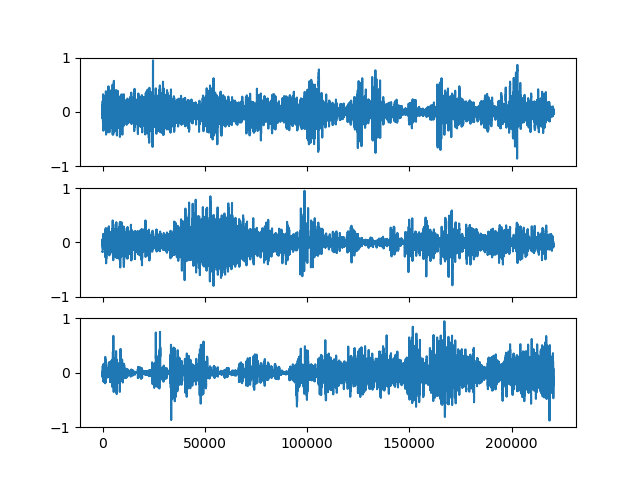

In [106]:
fig, axes = plt.subplots(audio.size(0),sharex=True)
for wav, ax in zip(audio, axes.flat):
    plt.sca(ax)
    plt.plot(wav.cpu().detach().numpy())
    plt.ylim(-1,1)

<IPython.core.display.Javascript object>


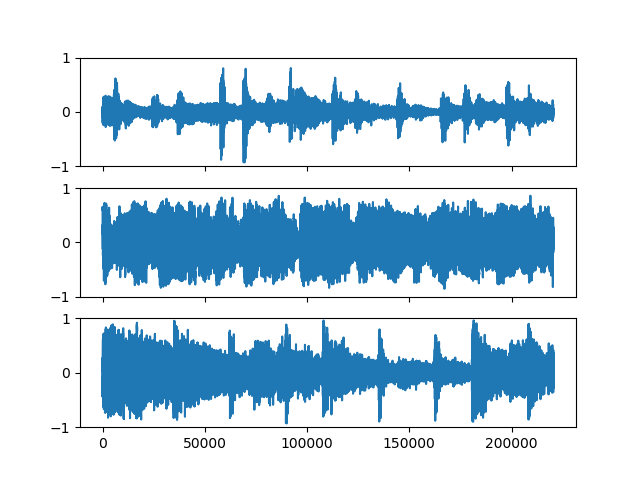

In [107]:
fig, axes = plt.subplots(audio.size(0),sharex=True)
for wav, ax in zip(true, axes.flat):
    plt.sca(ax)
    plt.plot(wav.cpu().detach().numpy())
    plt.ylim(-1,1)

In [112]:
tseg = samples2audio(true[B].detach().cpu().numpy().astype(np.float32))
tseg.duration_seconds, tseg.rms, tseg.dBFS

(5.0, 8806, -11.413425076724216)

In [115]:
seg = samples2audio(audio[B].detach().cpu().numpy())
seg.duration_seconds, seg.rms, seg.dBFS

(5.0, 3762, -18.800622874907155)

In [116]:
s2 = pydub.effects.normalize(seg)
s2.duration_seconds, s2.rms, s2.dBFS

(5.0, 3914, -18.45658227275471)

In [123]:
savepath = os.path.join(outroot, outgentemp.format(i+1,B))

In [83]:
tseg.export('control.mp3', format='mp3')
seg.export('gen8.mp3', format='mp3')
s2.export('gen8-norm.mp3', format='mp3')

<_io.BufferedRandom name='gen8-norm.mp3'>

In [46]:
x = s2.apply_gain_stereo(0)
x.rms, x.dBFS

(17306, -5.5450647116140805)

In [48]:
x = x.apply_gain_stereo(-3)
x.rms, x.dBFS

(14039, -7.362275218459605)

In [105]:
true = ckpt['train_data'][2][0]
true.shape

(44100,)

In [118]:
x = audio[0,0].detach().cpu().numpy().copy()#*2
#x = true.copy() #ref.copy()#/2
x.shape

(220500,)

In [119]:
rms = np.sqrt((x**2).mean())
rms

1.0098447

In [121]:
20*np.log10(rms)

0.0850914791226387

In [120]:
np.sqrt((x**2).mean()) * 2**15

33090.58984375

In [109]:
s = samples2audio(x.astype(np.float32))
s.rms, s.dBFS

(4993, -16.34176737809216)

In [110]:
s.dBFS

-16.34176737809216

In [111]:
#tseg.apply_gain(-14 - (-13.535)).dBFS

In [112]:
s.max

25082

In [113]:
from pydub.utils import db_to_float, ratio_to_db

In [114]:
db_to_float(-3)

0.7079457843841379

In [115]:
(x==0).sum()

6

In [116]:
20*np.log10(rms)

-16.340313441135358

In [117]:
10*np.log10(np.square(x+1e-10))

-16.340313441133492